In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. A line $L$ defined by a normal vector $w$ and an offset $b$,

$$
L = \{x \in \mathbb{R}^2: \left<x, w\right> + b = 0 \}, where\ w\in\mathbb{R}^2, b\in\mathbb{R}
$$


In [2]:
#
# compute an orthogonal vector of an input vector
#
def orthogonal(u):
  M = np.array([[0, -1], [1, 0]]) # rotation matrix of 90 degrees
  return M @ u

In [3]:
# 
# nomalize a vector
#
def normalize(u):
  return u / np.linalg.norm(u)

In [4]:
#
# compute 10 points of a line defined by a normal vector and an offset
# 
def line(w, b):
  x0 = - b / (np.linalg.norm(w)**2) * w # a point on the line

  ts = np.linspace(-10, 10, 10)
  v = normalize(orthogonal(w)) # the direction unit vector of the line
  points = np.array([v * t + x0 for t in ts])
  return points

In [5]:
#
# plot a line defined by w & b
#
def plot_line(w, b):
  points = line(w, b)
  plt.figure(figsize=(6,6))
  plt.plot(points[:, 0], points[:, 1], '--')

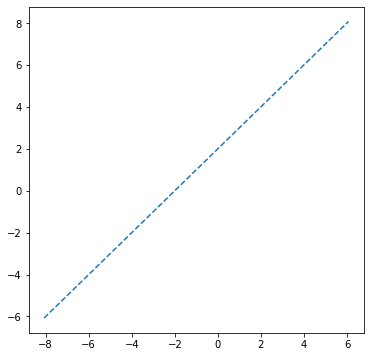

In [6]:
w = np.array([1, -1])
b = 2
plot_line(w, b)

## 2. Vector projection on the line $L$

In [7]:
#
# compute a rotation matrix of a given degree
#
def rotate(degree):
  rad = np.radians(degree)
  return np.array([[np.cos(rad), -np.sin(rad)], \
                   [np.sin(rad), np.cos(rad)]])

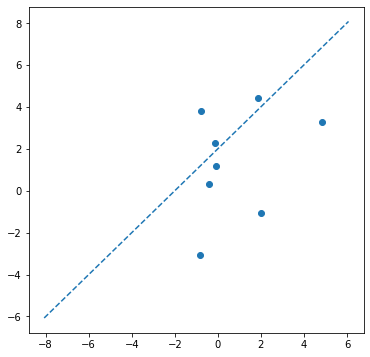

In [8]:
# some random points around the line L
np.random.seed(0)
X = np.random.randn(8, 2) \
  @ np.array([3, 0, 0, 2.5]).reshape(2,2) \
  @ rotate(60) \
  + np.array([-1.5, 3])

plot_line(w,b)
plt.scatter(X[:, 0], X[:, 1]);

### 2.1 project a vector $u$ onto a vector $v$,

$$
\mathbf{Proj}(u,v) = \frac{\left<u, v\right>}{||v||^2}v
$$

### 2.2 project a vector $u$ onto a line $L$ defined by a normal vector $w$ and an offset $b$,

$$
\begin{eqnarray*}
u' &=& u - \frac{-b}{||w||^2}w \\
\mathbf{Proj}(u', w) &=& \frac{\left<u',w\right>}{||w||^2}w \\
\mathbf{Proj}_L(u) &=& u' - \mathbf{Proj}(u', w) + \frac{-b}{||w||^2}w
\end{eqnarray*}
$$


In [9]:
#
# compute the projection points on the line
#
def project(X, w, b):        
    offset = -b/np.linalg.norm(w)**2 * w
    X_offset = X - offset
    w_unit = normalize(w)
    X_offset_proj = X_offset - (X_offset @ w_unit[:, np.newaxis]) * w_unit
    X_proj = X_offset_proj + offset
    return X_proj

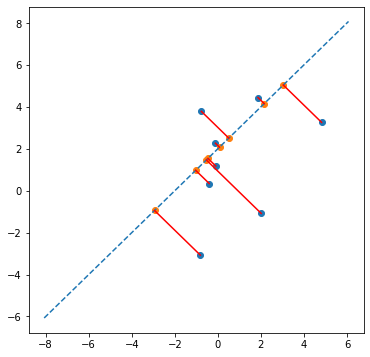

In [10]:
Y = project(X, w, b) # compute projection points
plot_line(w,b)
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(Y[:, 0], Y[:, 1]);
for x,y in zip(X, Y):
  plt.plot([x[0],y[0]],[x[1],y[1]], 'r')